### Dataset shape: (5898, 121)

### Column names:
['trial_id', 'label', 'onset_sec', 'duration_sec', 'FP1_mean', 'FP1_var', 'FP1_hjorth_activity', 'FP1_hjorth_mobility', 'FP1_hjorth_complexity', 'FP1_approx_entropy', 'FP1_alpha_beta_ratio', 'FP2_mean', 'FP2_var', 'FP2_hjorth_activity', 'FP2_hjorth_mobility', 'FP2_hjorth_complexity', 'FP2_approx_entropy', 'FP2_alpha_beta_ratio', 'FC3_line_length', 'FC3_ssc', 'FC3_zero_crossings', 'FC3_alpha_power', 'FC3_beta_power', 'FC3_alpha_beta_ratio', 'FC3_wavelet_energy', 'FC3_entropy', 'FC4_line_length', 'FC4_ssc', 'FC4_zero_crossings', 'FC4_alpha_power', 'FC4_beta_power', 'FC4_alpha_beta_ratio', 'FC4_wavelet_energy', 'FC4_entropy', 'FCZ_line_length', 'FCZ_ssc', 'FCZ_zero_crossings', 'FCZ_alpha_power', 'FCZ_beta_power', 'FCZ_alpha_beta_ratio', 'FCZ_wavelet_energy', 'FCZ_entropy', 'F3_var', 'F3_rms', 'F3_peak_to_peak', 'F3_theta_beta_ratio', 'F3_spectral_entropy', 'F4_var', 'F4_rms', 'F4_peak_to_peak', 'F4_theta_beta_ratio', 'F4_spectral_entropy',

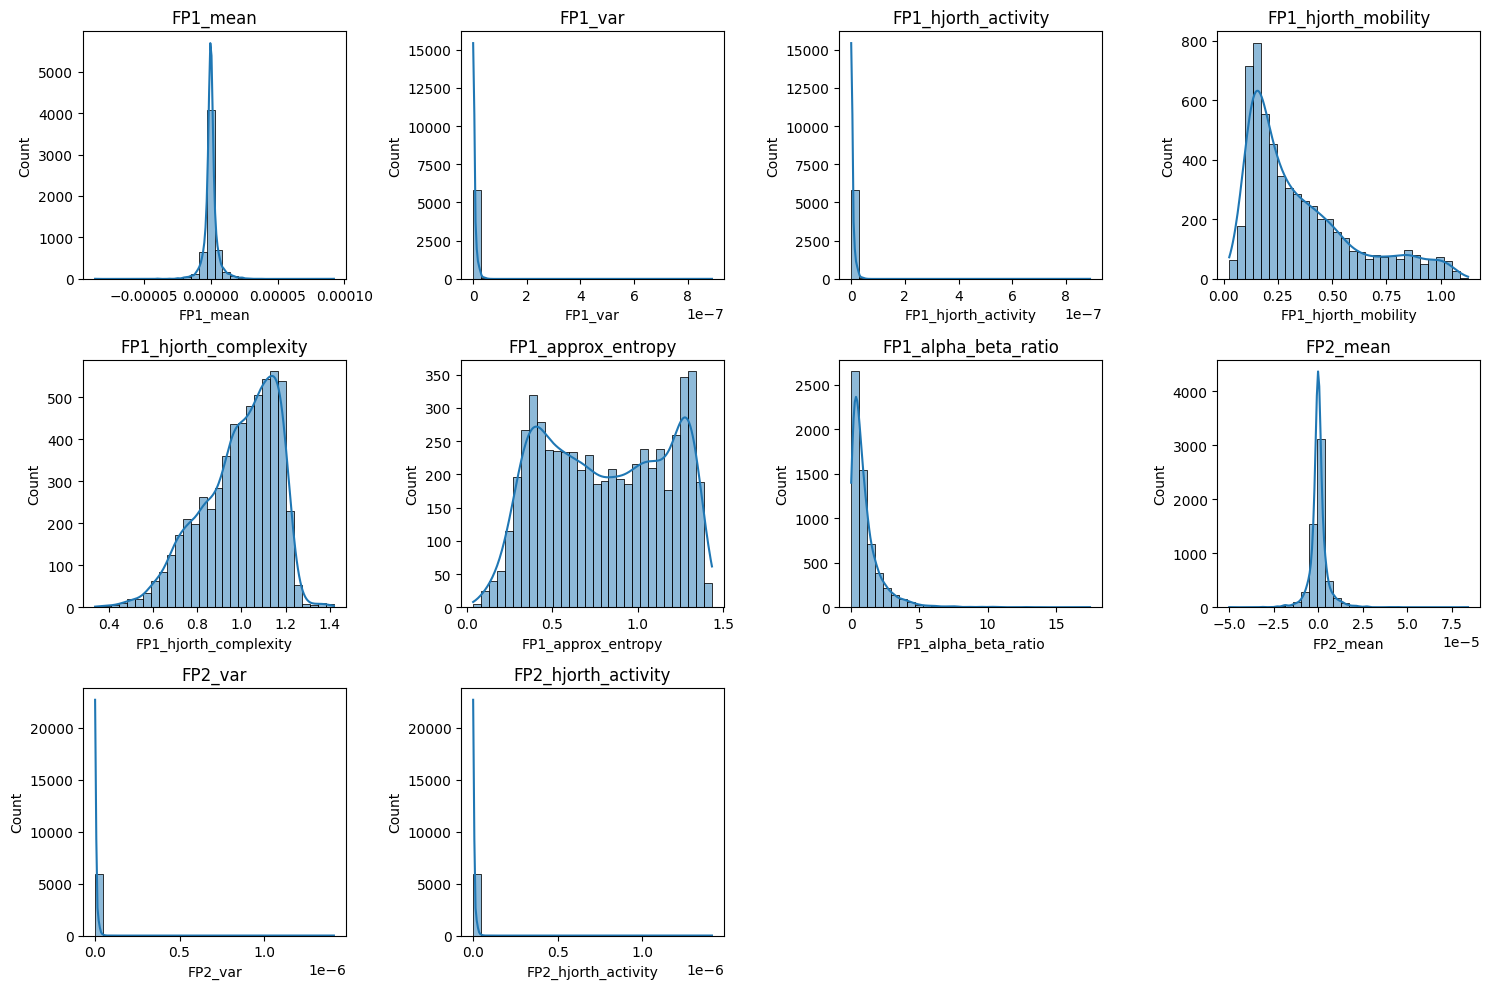


Plotting boxplots for same subset of features...


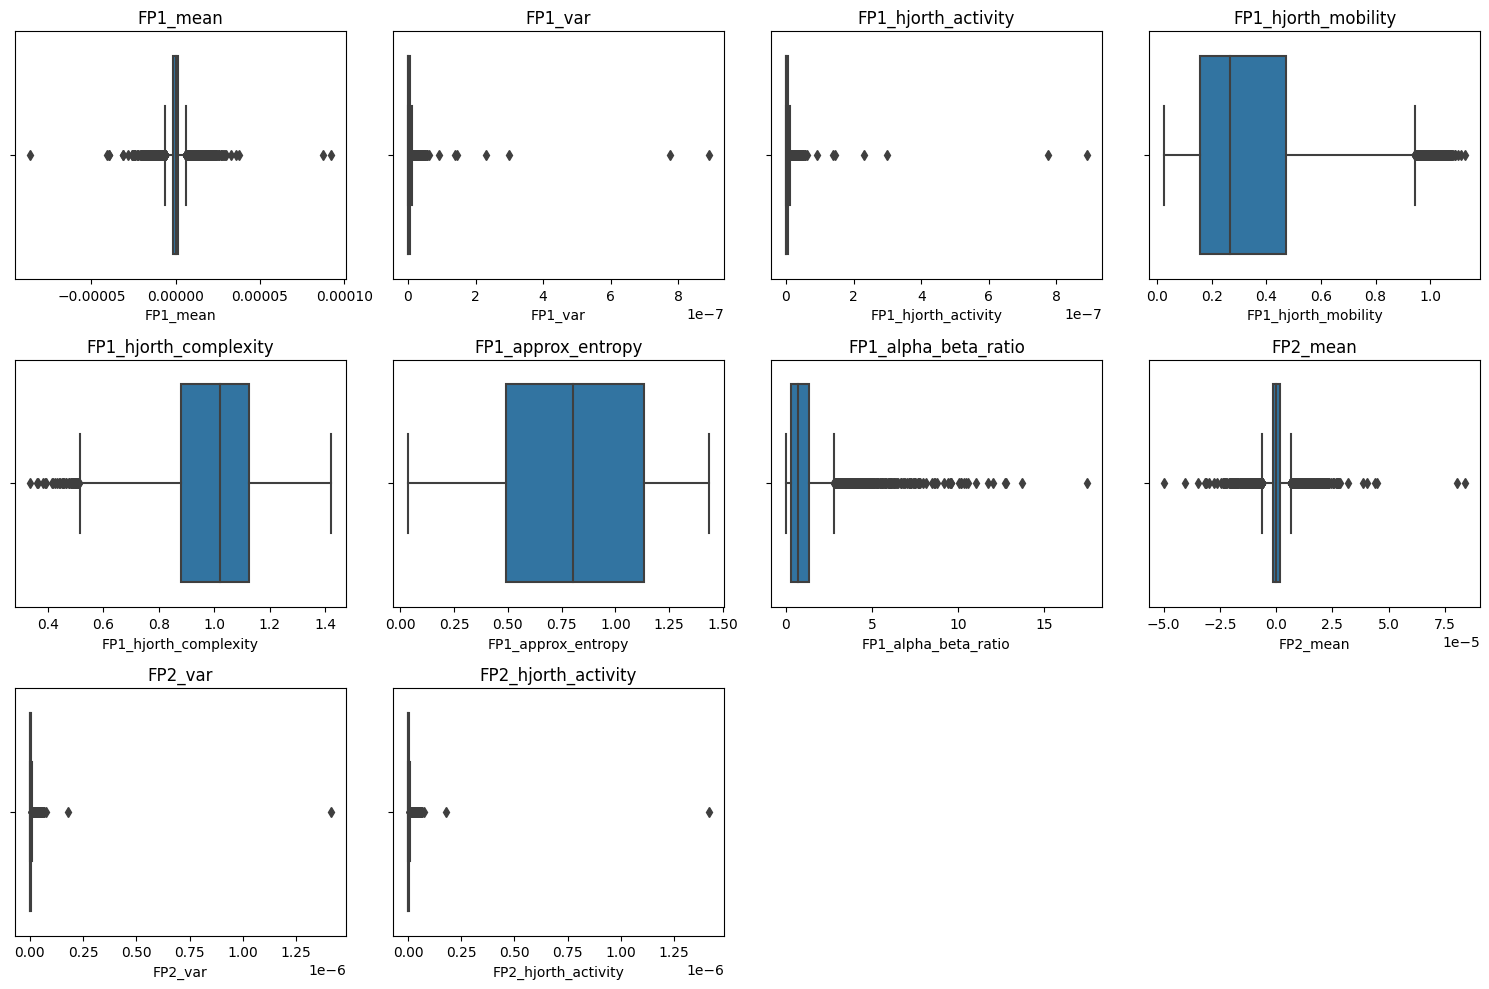


Plotting correlation heatmap for features...


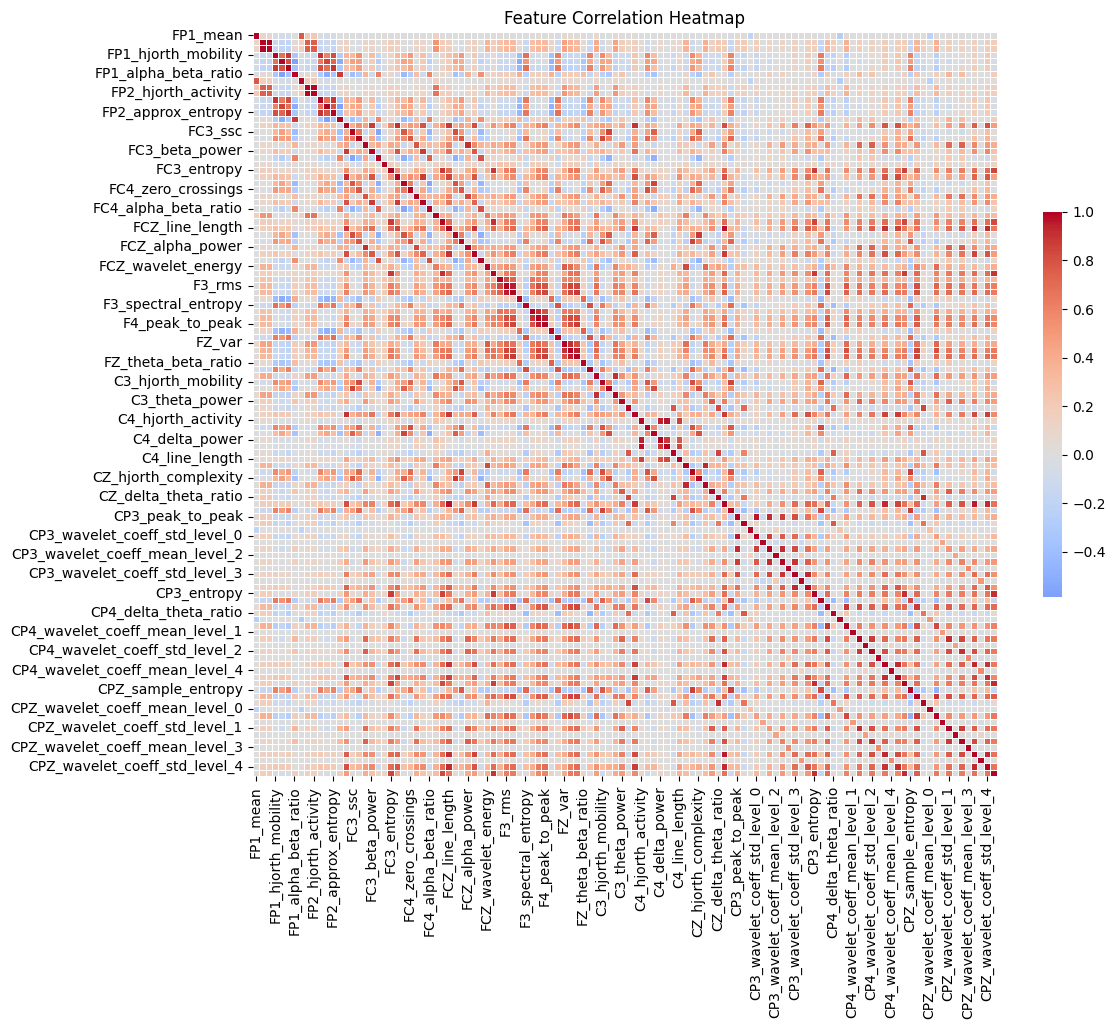

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load merged dataset
data_path = r"D:\ai\eeg_data\merged_features.csv"
df = pd.read_csv(data_path)

print("### Dataset shape:", df.shape)
print("\n### Column names:")
print(df.columns.tolist())

# --- 1. Check class balance distribution (assuming 'label' or 'group' columns exist) ---
if 'label' in df.columns:
    print("\nClass distribution based on 'label':")
    print(df['label'].value_counts(normalize=True) * 100)  # % distribution

if 'group' in df.columns:
    print("\nClass distribution based on 'group':")
    print(df['group'].value_counts(normalize=True) * 100)

# --- 2. Summary statistics for all numeric features ---
# Exclude meta columns from descriptive stats (adjust as needed)
meta_cols = ['trial_id', 'label', 'onset_sec', 'duration_sec', 'group']
feature_cols = [col for col in df.columns if col not in meta_cols]

print("\n### Summary statistics of features:")
print(df[feature_cols].describe().T)

# --- 3. Range and spread check - print min and max values generally ---
print("\n### Feature ranges (min and max values):")
range_df = df[feature_cols].agg(['min', 'max']).T
print(range_df.sort_values('max', ascending=False))

# --- 4. Calculate skewness and kurtosis to check distribution shape per feature ---
print("\n### Skewness and kurtosis per feature:")
sk_df = pd.DataFrame({
    'skewness': df[feature_cols].skew(),
    'kurtosis': df[feature_cols].kurtosis()
}).sort_values(by='skewness', ascending=False)
print(sk_df)

# --- 5. Check missing values ---
print("\n### Missing values count per column:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# --- 6. Visualizations ---
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Histogram for small subset of features with different ranges
subset_features = feature_cols[:10]  # Modify as needed

print("\nPlotting histograms for a subset of features...")
plt.figure(figsize=(15, 10))
for i, feat in enumerate(subset_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[feat], bins=30, kde=True)
    plt.title(feat)
plt.tight_layout()
plt.show()

# Boxplot to visualize outliers
print("\nPlotting boxplots for same subset of features...")
plt.figure(figsize=(15, 10))
for i, feat in enumerate(subset_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[feat])
    plt.title(feat)
plt.tight_layout()
plt.show()

# Correlation heatmap for features (to understand relationships)
print("\nPlotting correlation heatmap for features...")
plt.figure(figsize=(12, 10))
corr = df[feature_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title("Feature Correlation Heatmap")
plt.show()


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)